# Прогноз расхода топлива

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

Мы импортировали необходимые библиотеки: pandas, numpy, scipy, seaborn, matplotlib. Загружаем набор данных об автомобилях.

# Импорт данных

In [ ]:
car = pd.read_csv("C:/Users/Elena/Documents/MPGreg.csv", sep=(';'))
car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet_chevelle_malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick_skylark_320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth_satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc_rebel_sst
...,...,...,...,...,...,...,...,...,...
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw_pickup
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge_rampage
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford_ranger
391,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0,chevy_s-10


Мы видим датафрейм: 392 строки, 9 столбцов.
В строке представлены сведения об отдельной марке автомобиля.
В столбцах представлены следующие параметры: mpg (расход топлива в милях на галлон), cylinders (количество цилиндров), displacement (объем двигателя в литрах),	horsepower (мощность двигателя в лошадиных силах), weight (масса автомобиля в килограммах),	acceleration (скорость разгона до 100 км в секундах), model_year (год выпуска автомобиля), origin (регион производства), car_name (марка автомобиля). Регион производства закодирован: 1 - США, 2 - Европа, 3 - Япония.
Пропуски были предварительно удалены из набора данных.

Мы рассматриваем признак 'car_name' как номинальные некатегоризованные данные, поэтому сразу выводим его из исследования.   

In [ ]:
car=car.drop(['car_name'], axis = 1)

In [ ]:
car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
...,...,...,...,...,...,...,...,...
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0
391,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0


Построим матричный график pairplot для предварительной оценки данных.

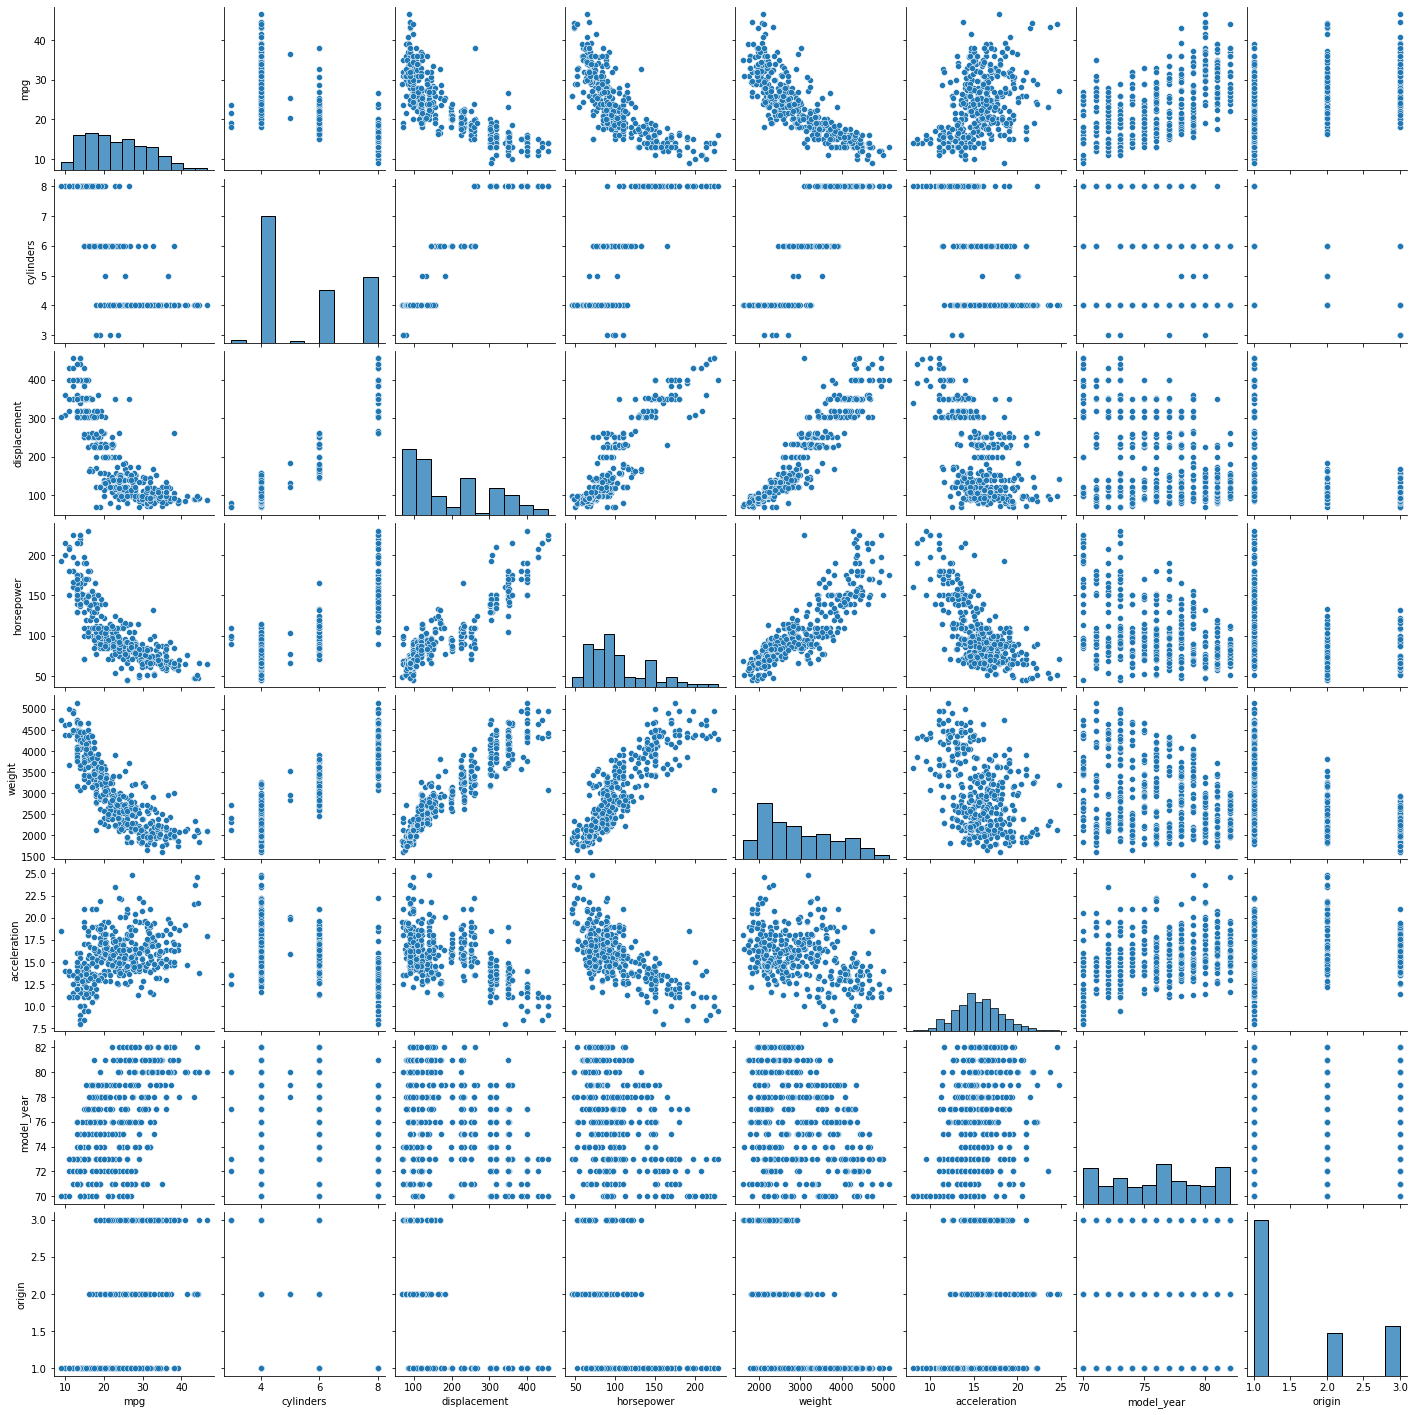

In [ ]:
cars = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']
sns_plot = sns.pairplot(car[cars])

По диагонали мы видим гистограммы распределения. В остальных ячейках матрицы - диаграммы рассеяния.
Очевидно, что для факторов 'origin', 'model_year' и 'cylinders' лучше найти другие, более информативные способы визуализации.
Однако уже на этом графике прослеживается множество корреляций.
Целевой параметр 'mpg' имеет явную обратную зависимость от факторов: 'displacement', 'horsepower', 'weight'. Обратная зависимость расхода топлива от объема двигателя, мощности двигателя, массы автомобиля объясняется особенностями измерения расхода топлива в США. Так, чем мощнее и тяжелее автомобиль, тем меньше миль он проедет на одном галлоне бензина.
Кроме того, целевой параметр 'mpg' имеет прямую зависимость от факторов: 'model_year', 'origin'. Угадывается прямая корреляция с признаком 'acceleration'. Имеется зависимость с признаком 'cylinders', но ее нельзя назвать исключительно обратной. Далее мы покажем это на более наглядных графиках.
Кроме того, в матрице заметны корреляции признаков между собой, что может привести к эффекту мультиколлинеарности при построении моделей. Например, у признака 'displacement' наблюдается прямая связь с признаками 'horsepower', 'weight' и обратная зависимость с фактором 'acceleration'. У признака 'weight', помимо прочего, очень сильна корреляция с признаком 'origin'.

Построим гистограммы для отдельных параметров, чтобы визуализировать распределение выборки.

# Гистограммы

<AxesSubplot:>

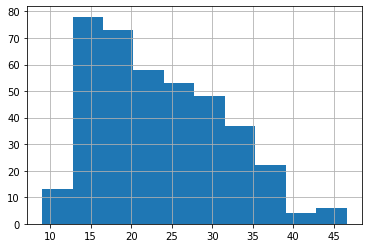

In [ ]:
car['mpg'].hist(bins=10)   # расход топлива

<AxesSubplot:>

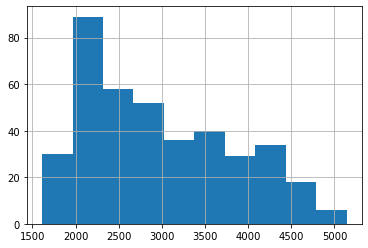

In [ ]:
car['weight'].hist(bins=10)    # масса автомобиля

<AxesSubplot:>

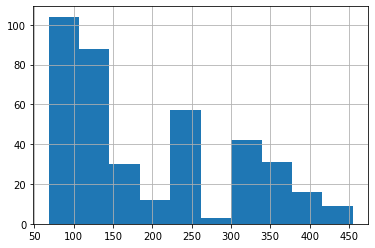

In [ ]:
car['displacement'].hist(bins=10)   # объем двигателя

<AxesSubplot:>

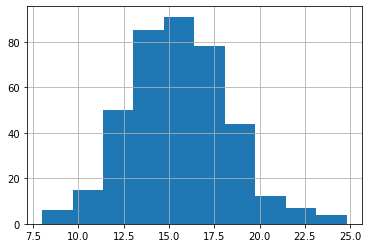

In [ ]:
car['acceleration'].hist(bins=10)   # скорость разгона

<AxesSubplot:>

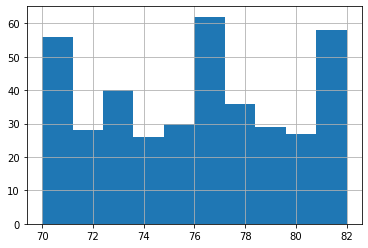

In [ ]:
car['model_year'].hist(bins=10)   # год выпуска

<AxesSubplot:>

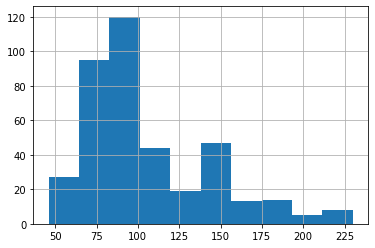

In [ ]:
car['horsepower'].hist(bins=10)   # мощность двигателя в л.с.

Количество столбцов в гистограммах определили опытным путем: менее 10 столбцов было менее информативно. Так, например, на распределении параметра 'mpg' стало очевидно, что есть не очень большая группа (менее 15 %) с чрезвычайно большим расходом топлива.
По диаграммам видно сходство распределений для параметров 'mpg', 'horsepower', 'weight' и отчасти 'displacement'.
По гистограммам можно предположить, что распределение выборки не является нормальным. Только распределение признака 'acceleration' визуально похоже на нормальное. Проверим распределение, используя тест Шапиро-Уилка.

Проверка гипотезы о нормальности по Шапиро-Уилку

In [ ]:
stats.shapiro(car['mpg'])        # нормальность распределения по показателю "расход топлива"

ShapiroResult(statistic=0.9671697616577148, pvalue=1.0494927948911936e-07)

In [ ]:
stats.shapiro(car['horsepower']) # нормальность распределения по показателю "мощность двигателя в л.с."

ShapiroResult(statistic=0.9040973782539368, pvalue=5.021926207130975e-15)

In [ ]:
stats.shapiro(car['weight'])     # нормальность распределения по показателю "масса автомобиля"

ShapiroResult(statistic=0.9414661526679993, pvalue=2.601725432316293e-11)

In [ ]:
stats.shapiro(car['acceleration'])  # нормальность распределения по показателю "скорость разгона"

ShapiroResult(statistic=0.9918678402900696, pvalue=0.03054318018257618)

Тест Шапиро-Уилка показал, что величина p-value меньше 0,05. Величина p-value для признака 'acceleration' находится близко к критической зоне, однако все равно меньше 0,05. Это значит, что наша нулевая гипотеза, что распределение выборки соответствует закону нормального распределения Гаусса, неверна. Поэтому принимается альтернативная гипотеза о ненормальном распределении.

# Расчет описательных статистик

Используем метод .describe, чтобы рассчитать среднеквадратическое отклонение, среднее, минимальное и максимальное значения, оценить первый, второй и третий квартили. Для этого предварительно исключим признаки 'origin' и 'model_year', поскольку они не относятся к количественному типу данных.

In [ ]:
car.drop(['origin', 'model_year'],axis=1).describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


В таблице видно, что разброс параметра 'mpg' составляет от 9 до почти 47 миль на галлон, среднее значение расхода топлива - около 23 миль на галлон. При этом, в среднем, у представленных в выборке моделей - более 5 цилиндров, объем двигателя - около 2 литров, мощность двигателя - более 100 лошадиных сил, средняя масса - около 3 тонн, время разгона до 100 км/ч - около 16 секунд.

# Анализ влияния количественных и порядковых признаков

Построим графики для визуализации зависимостей между целевым параметром и факторами.
У нас имеются количественные непрерывные данные ('mpg', 'displacement', 'horsepower', 'weight', 'acceleration'), количественный дискретный признак 'cylinders' и порядковый признак 'model_year'.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

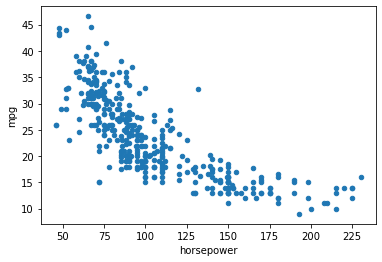

In [ ]:
car.plot('horsepower','mpg',kind="scatter")   # зависимость "расход топлива" vs "мощность двигателя"

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

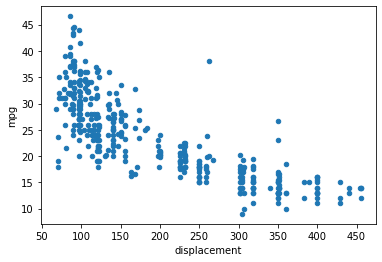

In [ ]:
car.plot('displacement','mpg',kind="scatter")    # расход топлива vs объем двигателя

<AxesSubplot:xlabel='weight', ylabel='mpg'>

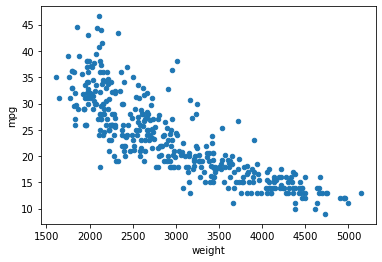

In [ ]:
car.plot('weight','mpg',kind="scatter")          # расход топлива vs масса автомобиля

На трех построенных выше диаграммах рассеяния отчетливо видна обратная зависимость параметра 'mpg' от факторов 'horsepower', 'displacement' и 'weight'. Очевидно, что, чем больше мощность и объем двигателя, а также чем больше масса автомобиля, тем больше расход топлива, т.е., в нашем случае, тем меньше миль пройдет автомобиль на одном галлоне бензина.
Настороженность вызвали две точки, похожие на выбросы: одна на диаграмме с 'horsepower', вторая - на диаграмме с 'displacement'. Однако это разные автомобили: один - около 130 л.с. и показателем расхода около 35 миль/галлон, а второй - объемом двигателя около 2,5 л и с расходом около 40 миль/галлон. Следовательно, это не "грязные" наблюдения, а отдельные экономичные автомобили. Удалять эти наблюдения мы не будем.  

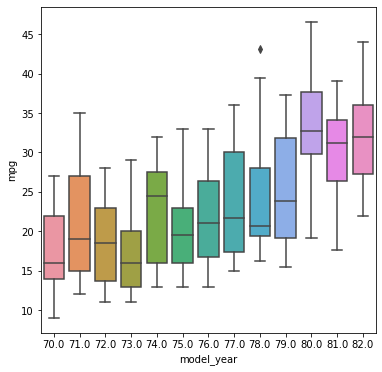

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                       # зависимость "расход топлива" vs "год выпуска"
fig = sns.boxplot(x='model_year', y='mpg', data=car)

Диаграмма размаха для года выпуска автомобиля оказалась нагляднее, чем диаграмма рассеяния, наверное, в силу дискретности признака. На диаграмме видно, что год производства влияет на расход топлива. Выброс для автомобилей 1978 г., заметный на графике, коррекции, на наш взгляд, не требует, так как значение параметра 'mpg' там не является запредельным (более 40 миль/галлон). По медианам расхода топлива, заметно, что средний расход топлива автомобилей, выпущенных в 1970 году, составляет около 16 миль/галлон. Средний расход топлива автомобилей, произведенных в 1982 году, улучшился почти в два раза, т.е. автомобиль проходит более 30 миль на одном галлоне. Можно предположить усовершенствование технологий автомобилестроения с течением времени.
Однако разброс очень велик. Так, например, разброс расхода, соответствующий 1980 г., - от менее 20 до более 45 миль на галлон.

Чтобы визуально оценить, верно ли наше предположение относительно развития технологий, посмотрим, как со временем менялись другие параметры.

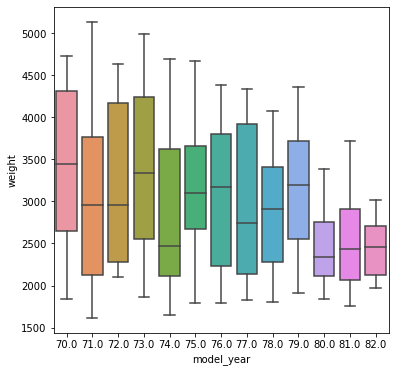

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                        # зависимость "год выпуска" vs "масса автомобиля"
fig = sns.boxplot(x='model_year', y='weight', data=car)

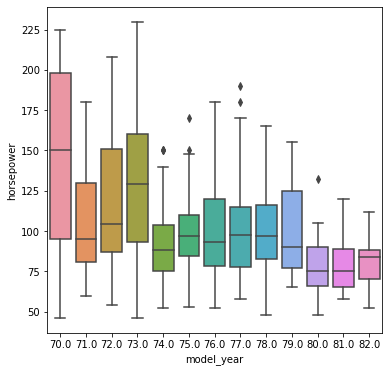

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                        # зависимость "год выпуска" vs "мощность двигателя в л.с."
fig = sns.boxplot(x='model_year', y='horsepower', data=car)

На двух диаграммах выше видна обратная зависимость и массы автомобиля, и мощности двигателя от времени, помимо указанной ранее корреляции расхода топлива с показателем времени.
Предположительно, первопричина этих корреляций в том, с течением времени автомобили становятся легче благодаря использованию, например, легких сплавов (как, например, переход со штампованных дисков на литые). Так, у автомобилей 1970 года средняя масса составляет около 3,5 тонн, у автомобилей 80-х гг. она уже менее 2,5 тонн. Если рассмотреть предельные максимальные значения массы автомобиля (более 5 тонн в 1971 и менее 3 тонн в 1982), разница еще значительней.
Для нас главным выводом является то, что с признаком времени коррелируют несколько параметров.

По диаграмме рассеяния, иллюстрирующей зависимость расхода топлива от скорости разгона, можно предположить, что корреляция между временем разгона и расходом топлива есть, но слабая - очень велик разброс значений.

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

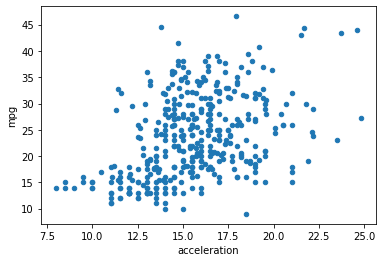

In [ ]:
car.plot('acceleration','mpg',kind="scatter")    # зависимость "расход топлива" vs "скорость разгона"

Рассмотрим зависимость расхода топлива от признака 'cylinders'. Поскольку значения показателя 'cylinders' дискретны, ящичная диграмма показалась нам более информативной, нежели диграмма рассеяния.

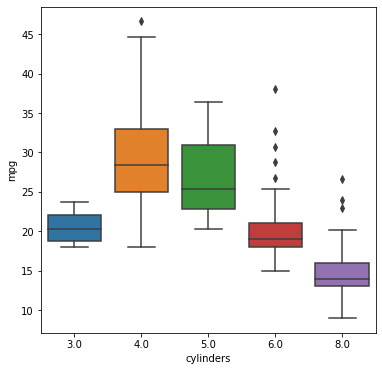

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                        # зависимость "расход топлива" vs "кол-во цилиндров"
fig = sns.boxplot(x='cylinders', y='mpg', data=car)

На диаграмме размаха выше заметна связь расхода топлива с количеством цилиндров, но зависимость, скорее, параболическая. Выбросы не убираем: понятно, что это отдельные особо экономичные автомобили.

In [ ]:
Бегло оценим взаимосвязь количества цилиндров с другими признаками.

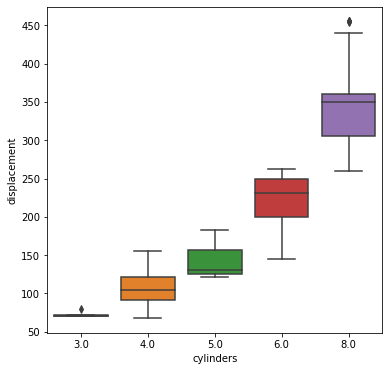

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                            # "объем двигателя" vs "кол-во цилиндров"
fig = sns.boxplot(x='cylinders', y='displacement', data=car)

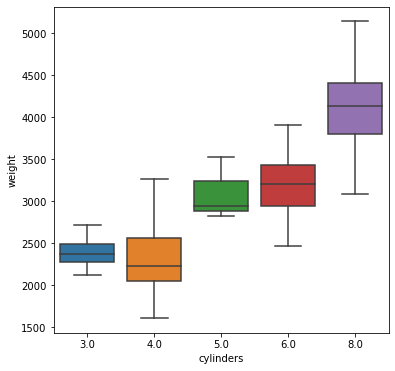

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                         # "масса автомобиля" vs "кол-во цилиндров"
fig = sns.boxplot(x='cylinders', y='weight', data=car)

На двух диаграммах выше заметна прямая зависимость объема двигателя и массы автомобиля от количества цилиндров.

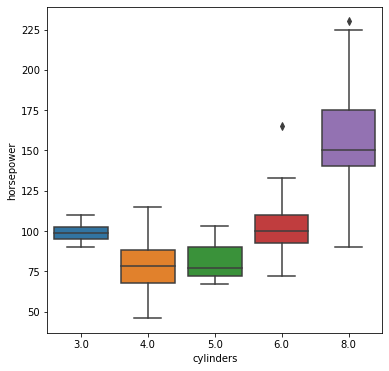

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                          # "мощность двигателя" vs "кол-во цилиндров"
fig = sns.boxplot(x='cylinders', y='horsepower', data=car)

На диграмме выше можно наблюдать параболическую зависимость. Так, например, 3 цилиндра соответствуют, в среднем, 100 л.с, а 4 цилиндра - 75 л.с. Начиная с 5 цилиндров, зависимость прямая: с увеличением количества цилиндров  увеличивается и мощность двигателя.

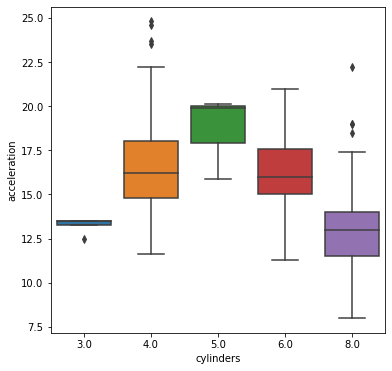

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                                  # "скорость разгона" vs "кол-во цилиндров"
fig = sns.boxplot(x='cylinders', y='acceleration', data=car)

Зависимость скорости разгона от количества цилиндров как будто зеркально отражает параболические кривые зависимости мощности и расхода от количества цилиндров. Особенно это заметно, если учесть максимальные показатели для 4 цилиндров на диаграмме.
Здесь для нас основным выводом является наличие у показателей 'mpg', 'horsepower' и 'acceleration' похожих корреляций с признаком 'cylinders'.

Проиллюстрируем взаимную зависимость объема двигателя и его мощности. Очевидна прямая зависимость. Однако привлекают внимание отдельные наблюдения с повышенными показателями мощности. Они не являются "грязными". Возможно, объяснение кроется в более изощренных технологиях (как, например, у современных турбированных двигателей наблюдается бОльшее количество лошадиных сил при сравнительно небольшом объеме). Для нас основной вывод заключается в том, что имеется некоторая диспропорция в прямой зависимости "мощность ~ объем".

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

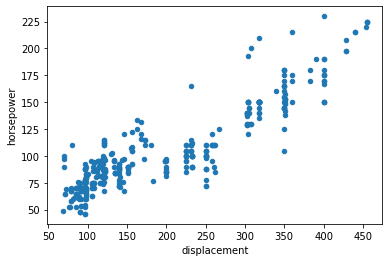

In [ ]:
car.plot('displacement','horsepower',kind="scatter")       # зависимость "мощность двигателя в л.с." vs "объем двигателя"

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

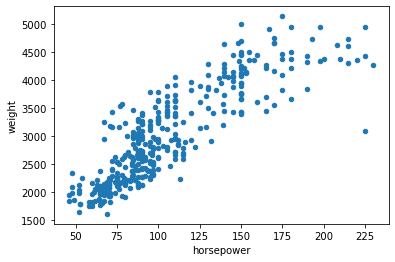

In [ ]:
car.plot('horsepower','weight',kind="scatter")            # зависимость "мощность двигателя в л.с." vs "масса автомобиля"

Налицо прямая зависимость: чем больше мощность двигателя, тем он тяжелее

<AxesSubplot:xlabel='horsepower', ylabel='acceleration'>

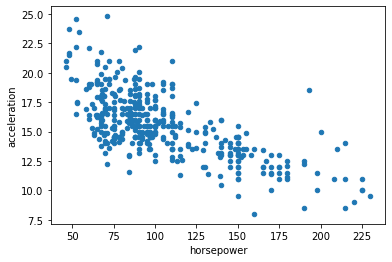

In [ ]:
car.plot('horsepower','acceleration',kind="scatter")           # зависимость "ускрорение" vs "мощность двигателя в л.с."

На диаграмме рассеяния заметна обратная зависимость скорости разгона от мощности двигателя: чем больше лошадиных сил в двигателе, тем меньше времени требуется для разгона до 100 км/ч

Чтобы проверить наши предположения относительно корреляций, проведем корреляционный анализ.

Рассчитаем корреляцию Пирсона для количественных показателей.

In [ ]:
car[['mpg','displacement','weight', 'horsepower', 'cylinders', 'acceleration']].corr(method='pearson')

,mpg,displacement,weight,horsepower,cylinders,acceleration
mpg,1.000000,-0.805127,-0.832244,-0.778427,-0.777618,0.423329
displacement,-0.805127,1.000000,0.932994,0.897257,0.950823,-0.543800
weight,-0.832244,0.932994,1.000000,0.864538,0.897527,-0.416839
horsepower,-0.778427,0.897257,0.864538,1.000000,0.842983,-0.689196
cylinders,-0.777618,0.950823,0.897527,0.842983,1.000000,-0.504683
acceleration,0.423329,-0.543800,-0.416839,-0.689196,-0.504683,1.000000


Мы видим сильную обратную корреляцию целевого параметра 'mpg' с признаками 'displacement', 'weight', а также с признаками 'horsepower' и 'cylinders'.
Имеется средняя прямая корреляция с признаком 'acceleration'.
Очевидны корреляции признаков между собой. Так, например, масса автомобиля, количество цилиндров, объем и мощность двигателя напрямую коррелируют между собой. Признак 'acceleration' сильно коррелирует с 'horsepower' и 'cylinders'. Это в дальнейшем приведет к эффекту мультиколлинеарности.

Рассчитаем ранговую корреляцию Спирмена для порядкового показателя 'model_year' и количественных показателей.

In [ ]:
car[['mpg','displacement','weight', 'horsepower', 'cylinders', 'acceleration','model_year']].corr(method='spearman')

,mpg,displacement,weight,horsepower,cylinders,acceleration,model_year
mpg,1.000000,-0.855234,-0.875585,-0.853616,-0.823175,0.441539,0.574841
displacement,-0.855234,1.000000,0.945630,0.876171,0.913566,-0.499403,-0.306582
weight,-0.875585,0.945630,1.000000,0.878819,0.875972,-0.405109,-0.280981
horsepower,-0.853616,0.876171,0.878819,1.000000,0.816188,-0.658142,-0.389498
cylinders,-0.823175,0.913566,0.875972,0.816188,1.000000,-0.476266,-0.331087
acceleration,0.441539,-0.499403,-0.405109,-0.658142,-0.476266,1.000000,0.278306
model_year,0.574841,-0.306582,-0.280981,-0.389498,-0.331087,0.278306,1.000000


У порядкового признака 'model_year' наблюдаются слабые корреляции с другими признаками. Заметна средняя прямая корреляция года выпуска автомобиля с эффективностью расхода топлива (0,57).

Чтобы наглядно представить выявленные корреляции, построим тепловые карты для корреляций по Пирсону и Спирмену.

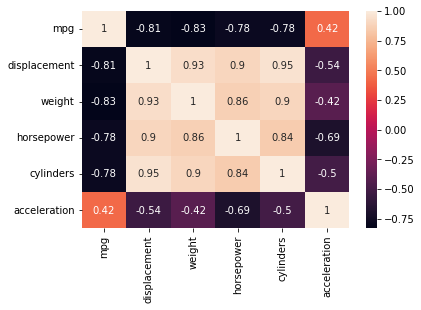

In [ ]:
num = ['mpg','displacement','weight', 'horsepower', 'cylinders', 'acceleration']
hm = sns.heatmap(car[num].corr(method='pearson'),annot=True)

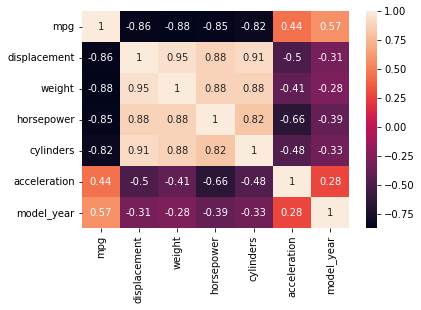

In [ ]:
ran = ['mpg','displacement','weight', 'horsepower', 'cylinders', 'acceleration','model_year']
hm = sns.heatmap(car[ran].corr(method = 'spearman'), annot=True)

Проверим нулевую гипотезу об отсутствии корреляционной связи, произведя расчеты p-value для отдельных признаков.

In [ ]:
scipy.stats.pearsonr(car.mpg, car.acceleration)   # проверка корреляционной связи между расходом топлива и скоротью разгона

(0.42332853690278727, 1.778576124804296e-18)

In [ ]:
scipy.stats.spearmanr(car.mpg, car.model_year)  # проверка корреляционной связи между расходом топлива и годом выпуска

SpearmanrResult(correlation=0.5748408744472727, pvalue=7.465531662277698e-36)

In [ ]:
scipy.stats.spearmanr(car.weight, car.model_year)  # проверка корреляционной связи между массой автомобиля и годом выпуска

SpearmanrResult(correlation=-0.2809806784672781, pvalue=1.5155854217476232e-08)

In [ ]:
scipy.stats.spearmanr(car.acceleration, car.model_year)  # проверка корреляционной связи между скоростью разгона и годом выпуска

SpearmanrResult(correlation=0.27830640387945466, pvalue=2.0984954188030466e-08)

По расчетам видно, что величина в каждом отдельном случае величина p-value меньше 0,05. Значит, мы отвергаем нулевую гипотезу об отсутствии корреляционной связи и принимаем альтернативную гипотезу, что корреляционная связь есть. Это утверждение справедливо и для корреляций, которые представлялись слабыми. Например, корреляционная связь между скоростью разгона и годом выпуска, хоть и слабая (0,28), но есть (p-value значительно меньше 0,05).

# Анализ влияния категориальных признаков

Визуализируем влияние на целевой параметр 'mpg' категориального признака 'origin'.

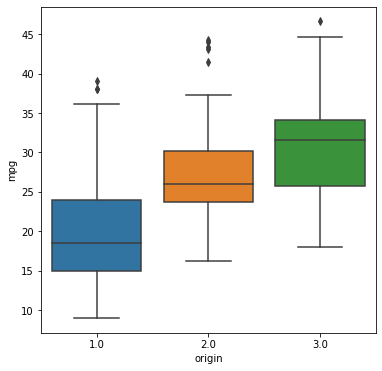

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))              # зависимость "расход топлива" vs "регион производства"
fig = sns.boxplot(x='origin', y='mpg', data=car)

На диаграмме размаха выше заметно, что фактор "регион производства" влияет на расход топлива. Самыми экономичными кажутся японские автомобили, самыми 'прожорливыми' - американские. Выбросы не удаляем, поскольку очевидно, что это отдельные особо экономичные автомобили. Кроме того, эти выбросы подчеркивают общую тендецию и не сильно отстоят от основной массы автомобилей.

В связи заявлением о 'прожорливости' американских автомобилей посмотрим, как с местом производства связаны, например, такие признаки, как вес автомобиля, мощность двигателя и скорость разгона.

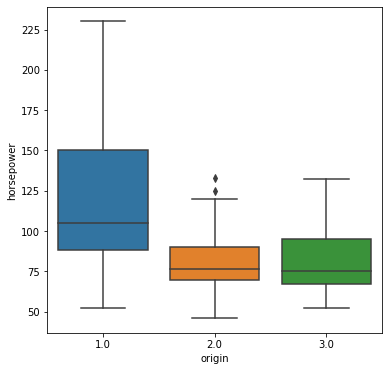

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                    # зависимость "мощность двигателя в л.с." vs "регион производства"
fig = sns.boxplot(x='origin', y='horsepower', data=car)

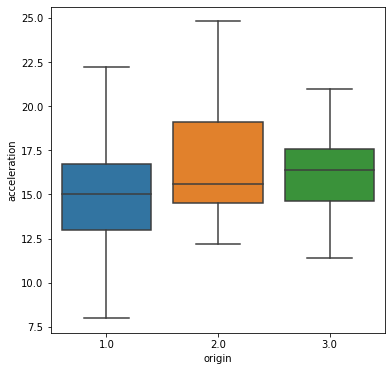

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                     # зависимость "скорость разгона" vs "регион производства"
fig = sns.boxplot(x='origin', y='acceleration', data=car)

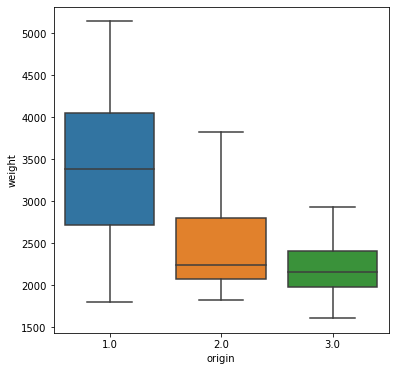

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))                  # зависимость "масса автомобиля" vs "регион производства"
fig = sns.boxplot(x='origin', y='weight', data=car)

Диаграммы размаха выше наглядно демонстрируют, что мощность двигателя отличается в пользу США незначительно. По признаку разгона США даже слегка отстают от других регионов. Зато вес автомобиля из США, в среднем, значительно больше такового в других регионах. Можно предположить, что вес и обусловливает большой расход топлива у автомобилей из США. Этот же вывод подтвердают расчеты средних значений для веса и расхода топлива, в зависимости от места происхождения автомобиля.

In [ ]:
car.groupby('origin')[['mpg']].mean()     # средний расход топлива в зависимости от региона производства

,mpg
origin,
1.0,20.033469
2.0,27.602941
3.0,30.450633


Расход топлива для группы 1 (США) в полтора раза больше, чем для группы 3 (Япония). Чуть меньше выражены отличия от группы 2 (Европа), но тенденция - та же.

In [ ]:
car.groupby('origin')[['weight']].mean()   # средняя масса автомобиля в зависимости от региона производства

,weight
origin,
1.0,3372.489796
2.0,2433.470588
3.0,2221.227848


Масса автомобиля для группы 1 (США) на треть больше, чем таковая для групп 2 (Европа) и 3 (Япония).

Проверим наличие корреляционной связи с категориальным признаком 'origin' по критерию Краскала-Уоллиса.

In [ ]:
car_o1=np.array(car[car['origin']==1]['mpg'])               # наличие корреляции между регионом производства и расходом топлива
car_o2=np.array(car[car['origin']==2]['mpg'])
car_o3=np.array(car[car['origin']==3]['mpg'])
stats.mstats.kruskalwallis(car_o1,car_o2,car_o3)

KruskalResult(statistic=132.0869646991599, pvalue=2.0781651131565895e-29)

In [ ]:
car_o1=np.array(car[car['origin']==1]['weight'])           # наличие корреляции между регионом производства и массой автомобиля
car_o2=np.array(car[car['origin']==2]['weight'])
car_o3=np.array(car[car['origin']==3]['weight'])
stats.mstats.kruskalwallis(car_o1,car_o2,car_o3)

KruskalResult(statistic=157.11236863796034, pvalue=7.646851051267776e-35)

In [ ]:
car_o1=np.array(car[car['origin']==1]['horsepower'])      # наличие корреляции между регионом производства и мощностью двигателя
car_o2=np.array(car[car['origin']==2]['horsepower'])
car_o3=np.array(car[car['origin']==3]['horsepower'])
stats.mstats.kruskalwallis(car_o1,car_o2,car_o3)

KruskalResult(statistic=105.59475799843663, pvalue=1.1759521262123952e-23)

In [ ]:
car_o1=np.array(car[car['origin']==1]['acceleration'])     # наличие корреляции между регионом производства и скоростью разгона
car_o2=np.array(car[car['origin']==2]['acceleration'])
car_o3=np.array(car[car['origin']==3]['acceleration'])
stats.mstats.kruskalwallis(car_o1,car_o2,car_o3)

KruskalResult(statistic=21.9271407983812, pvalue=1.7321355440708884e-05)

Далее мы построим регрессионные модели классическими методами.
Рассмотрим примеры парной и множественной регрессии.

# Парная регрессия

Построим три модели парной регрессии по методу наименьших квадратов для трех факторов, с которыми у параметра "расход топлива" наблюдается особенно высокая корреляция: 'weight', 'displacement' и 'horsepower'.

In [ ]:
import statsmodels.api as sm                    # подгружаем модули статистики
import statsmodels.formula.api as smf

Рассчитаем модель result_1 для зависимости расхода топлива от массы автомобиля.

In [ ]:
result_1 = smf.ols('mpg ~ weight', data=car).fit()   # модель парной регрессии "расход топлива" vs "масса автомобиля"
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          6.02e-102
Time:                        11:40:10   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Проанализируем полученные показатели.
Коэффициент детерминации (R-squared) составляет почти 0,7, при этом значение p-value для статистики Фишера (Prob (F-statistic))- меньше 0,05. Значит, модель адекватная.  
По статистике Стьюдента проверяем гипотезу, что свободный член можно положить равным нулю. Так как p-value (P>|t|) здесь меньше 0,05, нулевую гипотезу отклоняем. Следовательно, свободный член значим. Аналогично проверяем коэффициент для массы автомобиля, p-value < 0,05. Следовательно, оба параметра значимы.
Проверяем остатки на нормальность, используя тест Жарка-Бера. Нулевая гипотеза, что остатки нормальны не подтверждается, так как p-value (Prob(JB)) значительно меньше 0,05. Следовательно, остатки ненормальны.

Рассчитаем модель result_2, которая отражает зависимость расхода топлива от объема двигателя.

In [ ]:
result_2 = smf.ols('mpg ~ displacement', data=car).fit()  # модель парной регрессии "расход топлива" vs "объем двигателя"
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.66e-90
Time:                        11:40:15   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Проанализируем результаты.
Коэффициент детерминации (R-squared) - чуть меньше (около 6,5), значение p-value для статистики Фишера (Prob (F-statistic)) - меньше 0,05. Следовательно, модель адекватная.  
По статистике Стьюдента проверяем гипотезу, что свободный член или коэффициент для объема двигателя можно положить равными нулю. Так как p-value (P>|t|) в обоих случаях меньше 0,05, нулевую гипотезу отклоняем, - оба параметра значимы.
Проверяем остатки на нормальность по критерию Жарка-Бера. Нулевая гипотеза, что остатки нормальны не подтверждается, так как p-value (Prob(JB)) меньше 0,05. Следовательно, остатки ненормальны.

Построим еще одну модель парной регрессии result_3, которая отражает зависимость расхода топлива от мощности двигателя.

In [ ]:
result_3 = smf.ols('mpg ~ horsepower', data=car).fit() # модель парной регрессии "расход топлива" vs "мощность двигателя в л.с."
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           7.03e-81
Time:                        11:40:18   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Проанализируем полученную модель.
Коэффициент детерминации (R-squared) - еще меньше (6), но значение p-value для статистики Фишера (Prob (F-statistic)) - меньше 0,05. Следовательно, модель адекватная.  
По статистике Стьюдента проверяем гипотезу, что свободный член или коэффициент мощности двигателя можно положить равными нулю. Так как p-value (P>|t|) в обоих случаях меньше 0,05, нулевую гипотезу отклоняем, - оба параметра значимы.
Проверяем остатки на нормальность по критерию Жарка-Бера. Нулевая гипотеза, что остатки нормальны не подтверждается, так как p-value (Prob(JB)) меньше 0,05. Следовательно, остатки ненормальны. Заметно, однако, что в этой модели лучше показатели асимметрии (skew) и эксцесса (kurtosis), а p-value здесь на много порядков больше, чем в двух предыдущих моделях.

Таким образом, все три построенные модели парной регресии, в целом, адекватны и имеют схожий коэффициент детерминации.
Визуализируем результат парной регрессии для зависимости "расход топлива" ~ "мощность двигателя".

C:\Users\Elena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


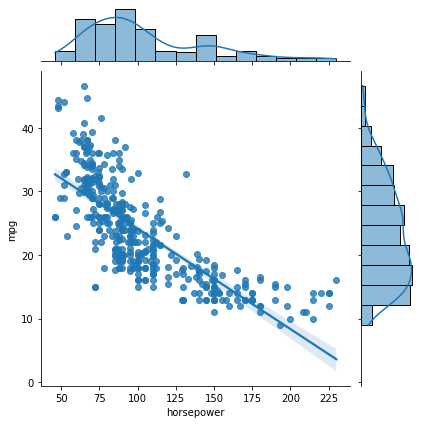

In [ ]:
sns.jointplot('horsepower', 'mpg', data=car, kind="reg")

Далее построим модель множественной регресии.

# Множественная регрессия

Построим аддитивную модель множественной регрессии по методу наименьших квадратов.
(# Программно реализовать гиперболическую кривую пока мы не в состоянии.)

Введем категориальные данные через инструмент One hot encoding C().

Ранее мы выяснили, что все признаки имеют корреляцию с расходом топлива, однако мы не можем их все использовать в построении модели, в частности, из-за упомянутого ранее эффекта мультиколлинеарности.

Проиллюстрируем:

In [ ]:
result_4 = smf.ols('mpg~ displacement + horsepower + weight + acceleration + cylinders + model_year +C(origin)', data=car).fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          1.79e-139
Time:                        11:40:29   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.9546      4.677     -3.839      0.000     -27.150      -8.759
C(origin)[T.2.0]     2.6300      0.566      4.643      0.000       1.516       3.744
C(origin)[T.3.0]     2.8532      0.553      5.162      0.000       1.766       3.940
displacement         0.0240      0.008      3.133      0.002       0.009       0.039
horsepower          -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight              -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration         0.0791      0.098      0.805      0.421      -0.114       0.272
cylinders           -0.4897      0.321     -1.524      0.128      -1.121       0.142
model_year           0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Включив все факторы в модель, мы получаем очень высокий коэффициент детерминации (>0,8). Однако многие параметры исказились. Так, например, мощность двигателя оказалась незначимым фактором (p-value для коэффициента 'horsepower' - значительно больше 0,05), что противоречит здравому смыслу.
Как мы выяснили при корреляционном анализе, все признаки, кроме корреляции с целевым параметром, так или иначе коррелируют между собой, поэтому использование всех факторов в модели множественной регрессии будет некорректно.
Полученная модель непригодна для использования.

В связи с мультиколлинеарностью исключаем из модели факторы 'displacement', 'weight', 'cylinders' и 'acceleration'. Считаем новую модель множественной регрессии по методу наименьших квадратов.

In [ ]:
resultsm = smf.ols('mpg ~ C(origin) + model_year + horsepower', data=car).fit()    # модель множественной регрессии
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     282.5
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          2.31e-113
Time:                        11:40:34   Log-Likelihood:                -1093.4
No. Observations:                 392   AIC:                             2197.
Df Residuals:                     387   BIC:                             2217.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -19.1467      4.974     -3.850      0.000     -28.925      -9.368
C(origin)[T.2.0]     3.5200      0.598      5.888      0.000       2.345       4.695
C(origin)[T.3.0]     5.0885      0.564      9.027      0.000       3.980       6.197
model_year           0.6816      0.061     11.207      0.000       0.562       0.801
horsepower          -0.1037      0.007    -15.854      0.000      -0.117      -0.091
==============================================================================
Omnibus:                       14.792   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.406
Skew:                           0.459   Prob(JB):                     0.000452
Kurtosis:                       3.318   Cond. No.                     3.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Мы видим, что коэффициент детерминации снизился (до почти 7,5), однако он достаточно высок. Отметим значение p-value для статистики Фишера (Prob (F-statistic)< 0,05), которое подтверждает адекватность модели.
Налицо значимость аргументов и свободного члена (p-value P>|t| во всех случаях почти равно нулю).
Асимметрия и эксцесс на приемлемом уровне. Величина p-value для теста Жарка-Бера, хотя и не подтверждает гипотезу о нормальности остатков, в данном случае выше, чем в иных моделях.
Отметим, что мы анализировали различные модели. Все модели мы не стали включать в настоящий отчет, чтобы не перегружать его. Так, например, в одной из моделей множественной регрессии, вместо "мощности двигателя" мы задействовали "массу автомобиля". Результаты были хуже, скорее всего, из-за того, что имеется сильная корреляция между массой автомобиля и регионом производства. Ранее, с помощью статистики Краскала-Уоллиса, мы доказали, что корреляция массы автомобиля с регионом производства даже сильнее, чем с расходом топлива.

Интрепретируем полученную модель множественной регрессии.
Например, возьмем японский автомобиль 75 года выпуска с двигателем 100 л.с. Воспользуемся полученными коэффициентами. Для расчета расхода топлива мы умножаем год выпуска (75) на коэффициент 0,68, добавляем третий регион (5,08), вычитаем свободный член (-19,14), вычитаем 100 л.с., умноженных на коэффициент 0,1. Получаем, что расход топлива у рассматриваемого автомобиля составит 27 миль/галлон.

# Модели с использованием обучающей и тестовой выборок

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Мы импортировали библиотеки для точности и разбиения набора на обучающую и тестовую выборки.

Создадим фунционально зависимые фиктивные переменные (dummy variables) для категориального фактора 'origin'. Переменные o1, o2 и o3 будут соответствовать региону производства: США, Европа и Япония.

In [ ]:
car_1 = pd.concat((car,pd.get_dummies(car.origin, prefix="o", prefix_sep='',)),axis=1)

In [ ]:
car_2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,o1.0,o2.0,o3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,0,1,0
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,1,0,0
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,1,0,0
391,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0,1,0,0


In [ ]:
car_1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,o1.0,o2.0,o3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,0,1,0
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,1,0,0
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,1,0,0
391,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0,1,0,0


Введем параметры X и Y.

Для аргумента X исключим из набора данных: целевой параметр 'mpg'; исходный признак 'origin', предсталенный теперь фиктивными переменными 'o1', 'o2' и 'o3'; ряд признаков, которые мы считаем коррелированными с теми, что будем ипользовать для построения регрессионных моделей. Таким образом, в составе X останутся мощность двигателя, год выпуска и регион производства.

In [ ]:
X=car_1.drop(['mpg','displacement','weight', 'origin', 'cylinders', 'acceleration'],axis=1)

In [ ]:
X.head() # матрица признаков

,horsepower,model_year,o1.0,o2.0,o3.0
0,130.0,70.0,1,0,0
1,165.0,70.0,1,0,0
2,150.0,70.0,1,0,0
3,150.0,70.0,1,0,0
4,140.0,70.0,1,0,0


In [ ]:
Y=car_1[['mpg']] # Задаем вектор целевой переменной

In [ ]:
Y # целевая) переменная

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
...,...
388,44.0
389,32.0
390,28.0
391,31.0


Разбиваем выборку на обучающую и тестовую в соотношении 75 % к 25 %, соответственно, фиксируя случайность. Получаем четыре набора: Xtrn и Ytrn - для обучающей выборки, Xtest и Ytest - для тестовой выборки.
Наша задача - создать модель на основе обучающей выборки, где параметры Xtrn и Ytrn алгоритму известны.
Затем необходимо проверить полученную модель на основе и обучающей, и тестовой выборок.
Алгоритму сообщаются значения Xtrn и значения Xtest. Прогнозные значения Ytrn_pred и Ytest_pred машина рассчитывает самостоятельно. Тогда мы можем сравнить посчитанные алгоритмом значения с фактическими значениями Ytrn и Ytest, которые мы возьмем из исходного набора данных.

In [ ]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, Y, test_size=0.25, random_state=42) # разбиение на train и test

Так в обучающей выборке мы получаем 294 наблюдения.

In [ ]:
Xtrn.shape

(294, 5)

Для построения моделей воспользуемся алгоритмами "линейный регрессор", "дерево решений" и "случайный лес".

# Linear Regressor

In [ ]:
LR = lm.LinearRegression()

In [ ]:
model = LR.fit(Xtrn,Ytrn) # Обучение на выборке train

In [ ]:
model.intercept_, model.coef_ # Коэффициенты уравнения модели

(array([-17.61424121]),
 array([[-0.10374572,  0.70335275, -3.1648114 ,  0.80250375,  2.36230765]]))

In [ ]:
r2 = model.score(Xtrn,Ytrn) # Коэффициент детерминации
r2

0.7560858457120458

In [ ]:
Ytrn_pred=model.predict(Xtrn) # Предсказание на train
Ytest_pred=model.predict(Xtest) # Предсказание на test

# Метрики качества

Импортируем библиотеки для оценки качества моделей. Будем оценивать показатели MSE (средняя квадратическая ошибка), RMSE (корень из среднеквадратической ошибки) и R2 (коэффициент детерминации).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import math

In [ ]:
mse_tr= mean_squared_error(Ytrn, Ytrn_pred)     # среднеквадратическая ошибка для обучающей выборки
mse_te=mean_squared_error(Ytest, Ytest_pred)    # среднеквадратическая ошибка для тестовой выборки

rmse_tr=math.sqrt(mse_tr)                       # корень из среднеквадратической ошибки для обучающей выборки
rmse_te=math.sqrt(mse_te)                       # корень из среднеквадратической ошибки для тестовой выборки

r2_tr=r2_score(Ytrn, Ytrn_pred)                 # коэффициент детерминации для обучающей выборки
r2_te=r2_score(Ytest, Ytest_pred)               # коэффициент детерминации для тестовой выборки

Таким образом, сравниваются прогноз целевого параметра и фактическое значение целевого параметра из набора данных.
Сначала сравнение производится для обучающей выборки (tr), затем для тестовой (te).
Выведем на экран полученные результаты сравнения для линейного регрессора.

Linear Regressor

In [ ]:
print('MSE train: {:.2f}, test: {:.2f}'.format(mse_tr, mse_te)) # среднеквадратич.ошибка для обучающей и для тестовой выборок

print('RMSE train: {:.2f}, test: {:.2f}'.format(rmse_tr, rmse_te)) # корень из среднеквадр. ошибки обучающей и тестовой выборок

print('R2 train: {:.4f}, test: {:.4f}'.format(r2_tr, r2_te)) # коэффициент детерминации для обучающей и тестовой выборок

MSE train: 15.60, test: 15.56
RMSE train: 3.95, test: 3.94
R2 train: 0.7561, test: 0.6915


В целом, коэффициент детерминации обеих выборок сопоставим и достаточно высок.

Далее по аналогичной схеме рассмотрим алгоритмы "регрессионное дерево решений" и "случайный лес".

# Decision tree

In [ ]:
from sklearn import tree

In [ ]:
dtr = tree.DecisionTreeRegressor()

In [ ]:
modelTr = dtr.fit(Xtrn, Ytrn)

In [ ]:
Ytrn_pred_Tr=modelTr.predict(Xtrn) # Предсказание на train
Ytest_pred_Tr=modelTr.predict(Xtest) # Предсказание на test

Для Decision Tree

In [ ]:
mse_tr_Tr= mean_squared_error(Ytrn, Ytrn_pred_Tr)
mse_te_Tr=mean_squared_error(Ytest, Ytest_pred_Tr)

rmse_tr_Tr=math.sqrt(mse_tr_Tr)
rmse_te_Tr=math.sqrt(mse_te_Tr)

r2_tr_Tr=r2_score(Ytrn, Ytrn_pred_Tr)
r2_te_Tr=r2_score(Ytest, Ytest_pred_Tr)

In [ ]:
modelTr.feature_importances_

array([7.77637372e-01, 1.57035039e-01, 2.66564250e-02, 8.97298954e-05,
       3.85814346e-02])

Отметим, как алгоритм распределил факторы по значимости: главный фактор - мощность двигателя, уже второй по значимости фактор - регион производства - сильно уступает первому.

In [ ]:
print('MSE train: {:.2f}, test: {:.2f}'.format(mse_tr, mse_te))

print('RMSE train: {:.2f}, test: {:.2f}'.format(rmse_tr, rmse_te))

print('R2 train: {:.4f}, test: {:.4f}'.format(r2_tr, r2_te))

MSE train: 15.60, test: 15.56
RMSE train: 3.95, test: 3.94
R2 train: 0.7561, test: 0.6915


Коэффициенты детерминации в обучающей и тестовой выборках тоже оказались сопоставимы и оказывались около 0,7 - 0,75.

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RFR= RandomForestRegressor(n_estimators=100, max_features ='auto')

In [ ]:
modelRF = RFR.fit(Xtrn,Ytrn)

C:\Users\Elena\AppData\Local\Temp/ipykernel_14688/3376320579.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF = RFR.fit(Xtrn,Ytrn)


In [ ]:
modelRF.feature_importances_

array([0.79726846, 0.15594387, 0.02770266, 0.00542309, 0.01366191])

В распределении признаков по значимости тоже видим, что доминирует 'horsepower'.

In [ ]:
Ytrn_pred_RF=modelRF.predict(Xtrn) # Предсказание на train
Ytest_pred_RF=modelRF.predict(Xtest) # Предсказание на test

In [ ]:
mse_tr_RF= mean_squared_error(Ytrn, Ytrn_pred_RF)
mse_te_RF=mean_squared_error(Ytest, Ytest_pred_RF)

rmse_tr_RF=math.sqrt(mse_tr_RF)
rmse_te_RF=math.sqrt(mse_te_RF)

r2_tr_RF=r2_score(Ytrn, Ytrn_pred_RF)
r2_te_RF=r2_score(Ytest, Ytest_pred_RF)

Для Random Forest

In [ ]:
print('MSE train: {:.2f}, test: {:.2f}'.format(mse_tr_RF, mse_te_RF))

print('RMSE train: {:.2f}, test: {:.2f}'.format(rmse_tr_RF, rmse_te_RF))

print('R2 train: {:.4f}, test: {:.4f}'.format(r2_tr_RF, r2_te_RF))

MSE train: 2.84, test: 9.92
RMSE train: 1.68, test: 3.15
R2 train: 0.9556, test: 0.8033


Заметно, что на обучающей выборке модель работает точнее. Скорее всего, имеет место переобучение.
В целом, алгоритм случайный лес показал самый выскокий коэффициент детерминации.

# Сравнение моделей

Сравним модели алгоритмов линейного регрессора, дерева решений и случайного леса, полученные при разбиении выборок на обучающую и тестовую.

In [ ]:
mes = pd.DataFrame(np.array([['RMSE Train',rmse_tr,rmse_tr_Tr,rmse_tr_RF],
                             ['RMSE Test', rmse_te,rmse_te_Tr,rmse_te_RF],
                             ['R2 Train', r2_tr,r2_tr_Tr,r2_tr_RF],
                             ['R2 Test', r2_te,r2_te_Tr,r2_te_RF]]),
                   columns=['Metrics','Linear Regression','Decision Tree','Random Forest'])
mes=mes.set_index('Metrics')

In [ ]:
mes

,Linear Regression,Decision Tree,Random Forest
Metrics,,,
RMSE Train,3.949882569996491,1.2800426048748474,1.684832638058037
RMSE Test,3.9443561860312073,3.9028846387513636,3.1498903380201986
R2 Train,0.7560858457120458,0.9743836360810435,0.9556205241675196
R2 Test,0.6915132731302625,0.6979661213562653,0.8032679582934774


# Прогноз расхода топлива

Подадим в модель два автомобиля.
Для наглядности возьмем, во-первых, автомобиль, который мы рассмотрели в качестве примера для модели, полученной классическим методом множественной регрессии. Это японский автомобиль 75 года с мощностью двигателя 100 л.с.
Во-вторых, возьмем аналогичный автомобиль, только с мощностью 200 л.с.
Зададим новый аргумент Xnew.

In [ ]:
Xnew = pd.DataFrame(np.array([[100,75,0,0,1], [200,75,0,0,1]]),
                    columns=['horsepower', 'model_year', 'o1', 'o2', 'o3'])

In [ ]:
Xnew

,horsepower,model_year,o1,o2,o3
0,100,75,0,0,1
1,200,75,0,0,1


In [ ]:
Ynew_pred_LR=model.predict(Xnew)             # расчет прогноза Y линейным регессором
Ynew_pred_Tr=modelTr.predict(Xnew)           # прогноз Y дерева решений
Ynew_pred_RF=modelRF.predict(Xnew)           # прогноз Y случайного леса

In [ ]:
Ynew1 = [vector[0] for vector in Ynew_pred_LR.round(0)]

print('Прогноз LR:', Ynew1)

print('Прогноз Tr:', Ynew_pred_Tr)

print('Прогноз RF:', Ynew_pred_RF)

Прогноз LR: [27.0, 17.0]
Прогноз Tr: [22.  32.7]
Прогноз RF: [22.14566667 14.812     ]


Мы видим, что расстояние, которое автомобиль проходит на одном галлоне, во всех трех прогнозах больше для первого автомобиля примерно в полтора раза. Расчеты первого прогноза (Linear Regressor) аналогичны расчетам, которые мы получили классическим методом множественной регрессии. При сравнении трех моделей заметно, что самые нестабильные результаты и большую погрешность дает дерево решений.

Итак, мы получили четыре рабочие модели для расчета расхода топлива для автомобилей, аналогичных тем, что были представлены в исходном наборе данных. Особенно высокий коэффициент детерминации показала модель алгоритма "случайный лес".